<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/lab4-filters/DSP_lab4_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основное задание

## 2.1 Синтез частотно-избирательных КИХ-фильтров оконным методом


### 1. Сформировать идеальные частотные характеристики КИХ-фильтра, согласно параметрам по варианту. Количество отсчетов взять достаточно большим (N > 1000).

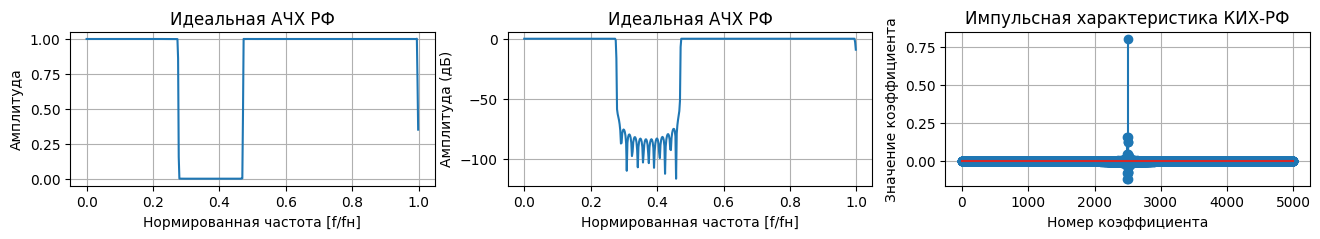

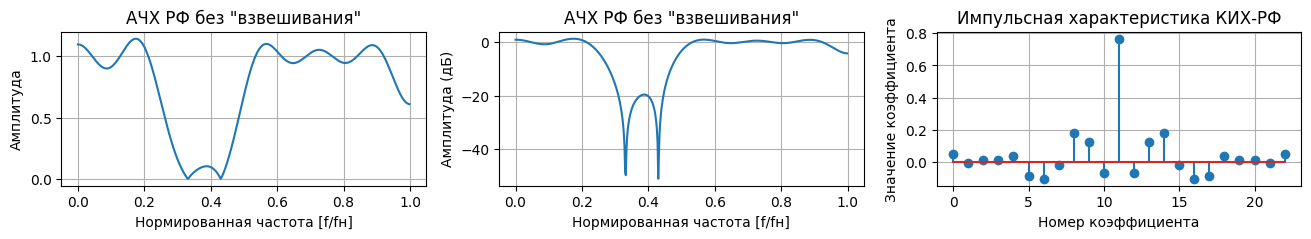

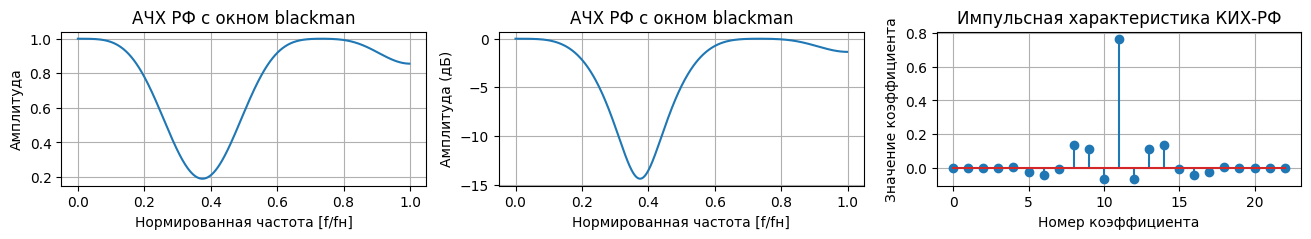

In [130]:
import numpy as np
from scipy.signal import firwin2, freqz, windows
import matplotlib.pyplot as plt

# Rejection filter (bandstop)
# Window type: blackman
variant = 12
fs = 720        # Hz
f0 = 150        # Hz
Fpass = 170     # Hz
Fstop = 100     # Hz
order = 22      # filter order

# Требования:
# спроектировать ФНЧ с частотой среза, равной 0.5*fн (fн - частота Найквиста), с частотой запирания, равной fн
# Порядок фильтра Nf = 22

# Параметры фильтра
N = 5000
Nf = order + 1  # Количество коэффициентов фильтра (порядок фильтра + 1)

# Для демонстрации эффекта использования оконных функций рассматриваются 2 примера:
# - с использованием прямоугольного окна
# - с использованием окна Хэмминга

# Определяем точки разделения частот для режекторного фильтра
freqs = [0, Fstop, Fpass, fs/2 - 1, fs/2]
# Задаем желаемый уровень амплитуды для каждой полосы частот
gains = [1, 0, 0, 1, 0]

window_types = ['boxcar', 'boxcar', 'blackman']
num_coefs = [N, Nf, Nf]
titles = ['Идеальная АЧХ РФ', 'АЧХ РФ без "взвешивания"', 'АЧХ РФ с окном blackman']

diap1 = np.linspace(0, Fstop, Fstop, endpoint=False, dtype=np.int32)
diap2 = np.linspace(Fstop, Fpass, (Fpass-Fstop), endpoint=False, dtype=np.int32)
diap3 = np.linspace(Fpass, (int(fs/2)), (int(fs/2)-Fpass), endpoint=True, dtype=np.int32)
# print(f'diap1 =\n{diap1}')
# print(f'diap2 =\n{diap2}')
# print(f'diap3 =\n{diap3}')
test_freqs = np.concatenate((diap1, diap2, diap3), dtype=np.int32)
# print(f'test_freqs =\n{test_freqs}')

test_gains = []
for i in range(len(test_freqs)):
  if(0 <= test_freqs[i] and test_freqs[i] < Fstop):
    test_gains.append(1)
  elif(Fstop <= test_freqs[i] and test_freqs[i] < Fpass):
    test_gains.append(0)
  elif(Fpass <= test_freqs[i] and test_freqs[i] < (fs/2)):
    test_gains.append(1)
  else:
    test_gains.append(0)
# print(f'test_gains =\n{test_gains}')
for i in range(len(window_types)):

    # Создание FIR фильтра низких частот
    filter_coefs = firwin2(num_coefs[i], test_freqs, test_gains, fs=fs, window=window_types[i])

    # Анализ характеристик фильтра
    w, h = freqz(filter_coefs)

    # Визуализация амплитудной характеристики фильтра
    plt.figure(figsize=(16, 2))
    plt.subplot(1,3,1)
    plt.plot(w/np.pi, abs(h))
    plt.title(titles[i])
    plt.xlabel('Нормированная частота [f/fн]')
    plt.ylabel('Амплитуда')
    plt.grid(True)

    plt.subplot(1,3,2)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.title(titles[i])
    plt.xlabel('Нормированная частота [f/fн]')
    plt.ylabel('Амплитуда (дБ)')
    plt.grid(True)

    # Визуализация импульсной характеристики фильтра
    plt.subplot(1,3,3)
    plt.stem(filter_coefs)
    plt.title('Импульсная характеристика КИХ-РФ')
    plt.xlabel('Номер коэффициента')
    plt.ylabel('Значение коэффициента')
    plt.grid(True)

    plt.show()
    print()

###2. Получить идеальную импульсную характеристику фильтра, применив ОБПФ к идеальной частотной характеристике фильтра.


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


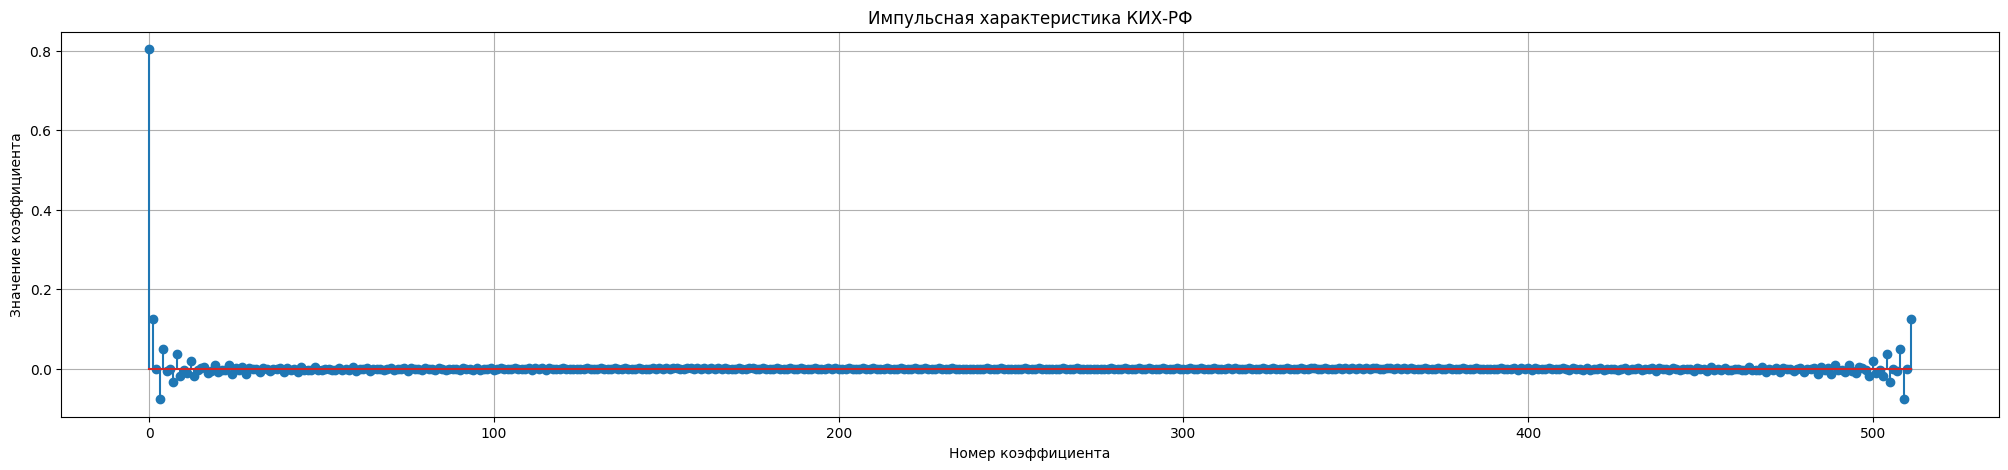

In [131]:
from scipy.fftpack import fft, fftfreq, ifft
# ideal_impulse = ifft(abs(h))

filter_coefs_ideal = firwin2(num_coefs[0], test_freqs, test_gains, fs=fs, window=window_types[0])
# Анализ характеристик фильтра
w_ideal, h_ideal = freqz(filter_coefs_ideal)
absh = abs(h_ideal)
absh_ifft = ifft(absh)
# print(f'impulse_cut =\n{impulse_cut}')
# print(f'len(h) = {len(h)},\nh =\n{h}')
# print(f'len(ideal_impulse) = {len(ideal_impulse)},\nideal_impulse =\n{ideal_impulse}')
plt.figure( figsize=(25, 5))
plt.stem(absh_ifft)
plt.title('Импульсная характеристика КИХ-РФ')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.grid(True)

###3. Сделать "усечение" идеальной импульсной характеристики до размера, равного порядку фильтра + 1. Это необходимо сделать таким образом, чтобы в импульсной характеристике остались значимые отсчеты: нулевой отсчет, отсчетов из отрицательной области и отсчетов из положительной области (подобно тому, как мы это делали в лабораторной работе №2 в задании с комплексной гармонической вырезкой).


len(impulse_cut) = 512


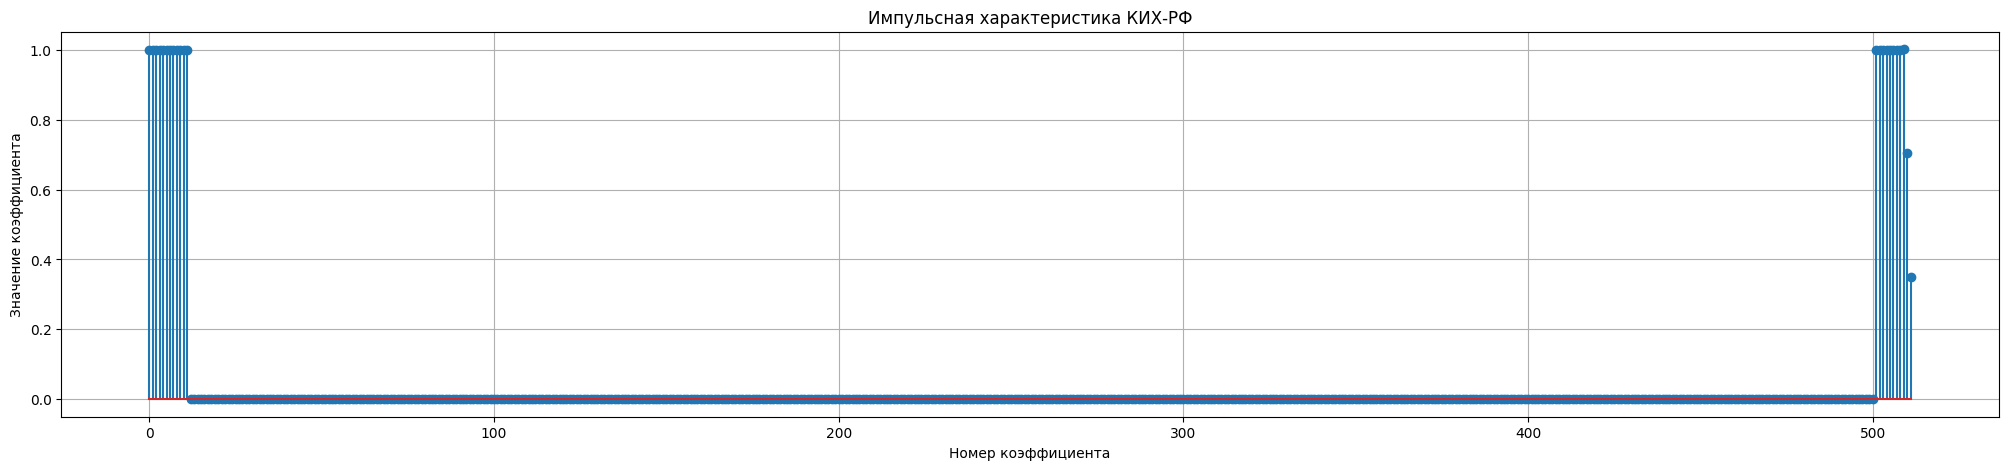

In [132]:
# print(h)
# absh = h
absh = abs(h_ideal)

imp_len = len(abs(h_ideal))
Nf_h = int((Nf-1)/2)

impulse_cut = np.concatenate((absh[0 : Nf_h + 1], np.zeros(imp_len - Nf), absh[imp_len - Nf_h : imp_len]))
print(f'len(impulse_cut) = {len(impulse_cut)}')
# impulse_cut_ifft = ifft(impulse_cut)
# print(impulse_cut)
plt.figure( figsize=(25, 5))
plt.stem(impulse_cut)
plt.title('Импульсная характеристика КИХ-РФ')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.grid(True)

###4. Построить частотные характеристики фильтра, соответствующие усеченной импульсной характеристике.


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


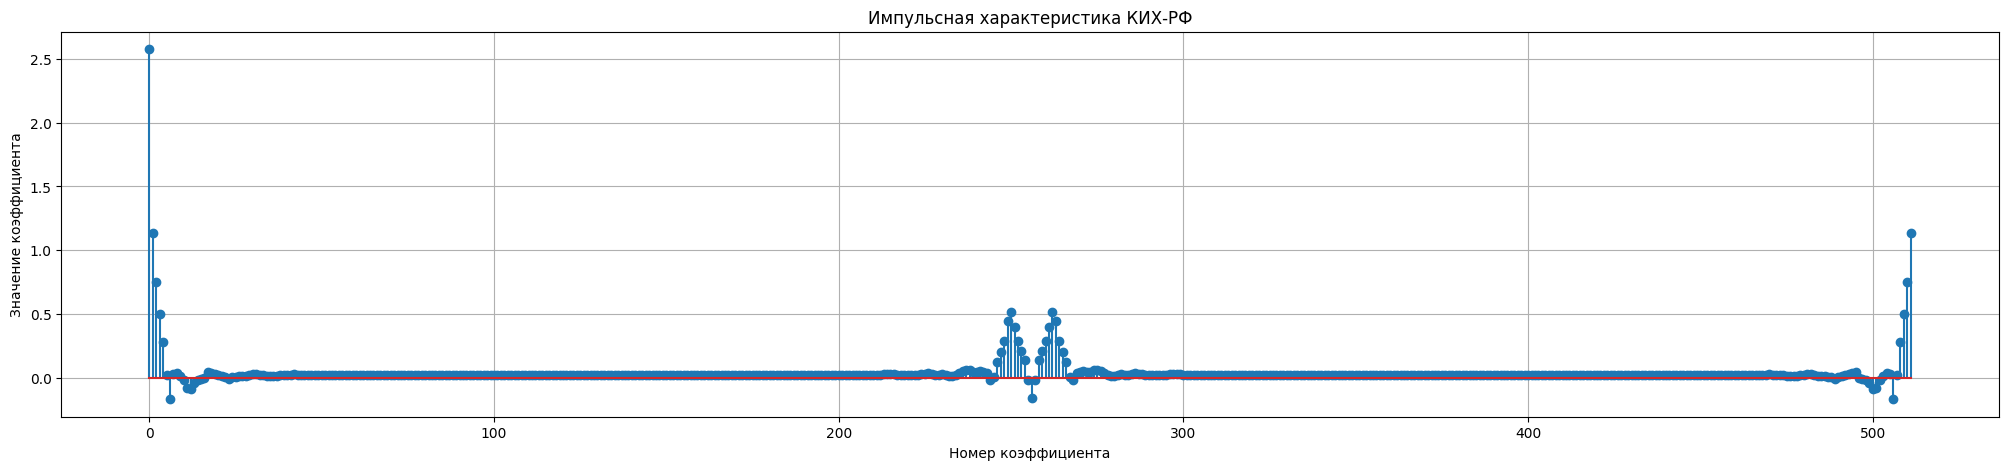

In [135]:
from scipy.fftpack import fft, fftfreq, ifft
# ideal_impulse = ifft(abs(h))

# Анализ характеристик фильтра
w_cut, h_cut = freqz(impulse_cut)
absh_cut = abs(h_cut)
absh_cut_ifft = ifft(absh_cut)
# print(f'impulse_cut =\n{impulse_cut}')
# print(f'len(h) = {len(h)},\nh =\n{h}')
# print(f'len(ideal_impulse) = {len(ideal_impulse)},\nideal_impulse =\n{ideal_impulse}')
plt.figure( figsize=(25, 5))
plt.stem(absh_cut_ifft)
plt.title('Импульсная характеристика КИХ-РФ')
plt.xlabel('Номер коэффициента')
plt.ylabel('Значение коэффициента')
plt.grid(True)

###5. Применить оконную функцию к импульсной характеристике (взвешивание). Для этого усеченную импульсную характеристику необходимо поэлементно умножить на массив соответствующей оконной функции нужного размера. Изобразить на графике усеченную импульсную характеристику фильтра до и после взвешивания, а также саму оконную функцию.


<ipython-input-154-741da1531d10>:7: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  window = blackman(window_size)


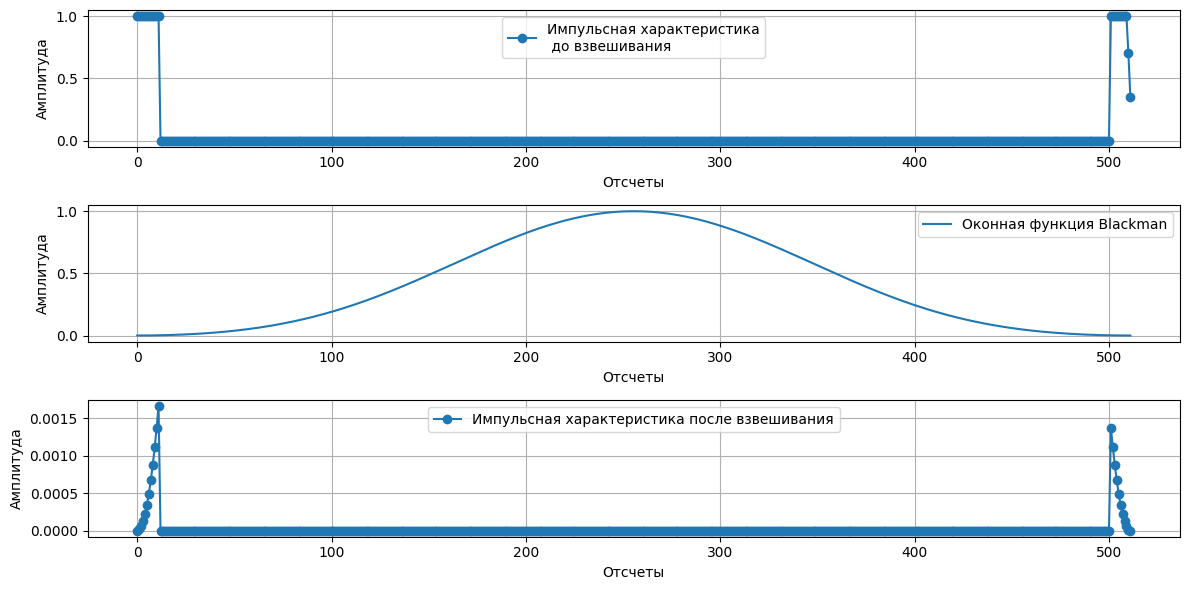

In [154]:
from scipy.signal import blackman

# Размер окна равен размеру усеченной импульсной характеристики
window_size = len(impulse_cut)

# Создаем оконную функцию Blackman нужного размера
window = blackman(window_size)

# Умножаем усеченную импульсную характеристику на оконную функцию
weighted_impulse_response = impulse_cut * window

# Изображаем усеченную импульсную характеристику фильтра до и после взвешивания, а также оконную функцию
plt.figure(figsize=(12, 6))

plt.subplot(311)
plt.plot(impulse_cut, marker='o', label='Импульсная характеристика\n до взвешивания')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend(loc='upper center')
plt.grid(True)


plt.subplot(312)
plt.plot(window, label='Оконная функция Blackman')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(313)
plt.plot(weighted_impulse_response, marker='o', label='Импульсная характеристика после взвешивания')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend(loc='upper center')
plt.grid(True)

plt.tight_layout()
plt.show()

###6. Построить частотные характеристики фильтра, соответствующие усеченной взыешенной импульсной характеристике. Проанализировать результаты и сделать выводы.

###7. Изучить возможности пакета scipy.signal.firwin2 для задачи синтеза КИХ-фильтра оконным методом. Синтезировать фильтр, используя функцию firwin2.


###8. Убедиться в идентичности результатов, полученных на этапах 6 и 7.

## 2.2 Применение фильтра к сигналу

###1. Сформировать сигнал, состоящий из двух гармоник разных амплитуд, как мы это делали в лабораторной работе №2. При этом, одна гармоника должна быть из области частот пропускания вашего КИХ-фильтра, а вторая - из области частот запирания.

###2. Применить разработанный фильтр к сигналу во временной области (исользуя свертку, np.convolve()).

###3. Построить графики сигнала во временной и в частотной областях до и после применения фильтра. Проанализировать результаты и сделать выводы.

# Пробный код

Коэффициенты фильтра:
[ 1.73942283e-03 -5.39577517e-04  2.48891356e-03 -3.17996780e-03
  4.95660141e-03 -1.03321207e-04  1.47904555e-02  2.17437866e-02
  6.36932094e-02  1.73918910e-01 -6.25653116e-02  3.88731812e-01
 -6.25653116e-02  1.73918910e-01  6.36932094e-02  2.17437866e-02
  1.47904555e-02 -1.03321207e-04  4.95660141e-03 -3.17996780e-03
  2.48891356e-03 -5.39577517e-04  1.73942283e-03]


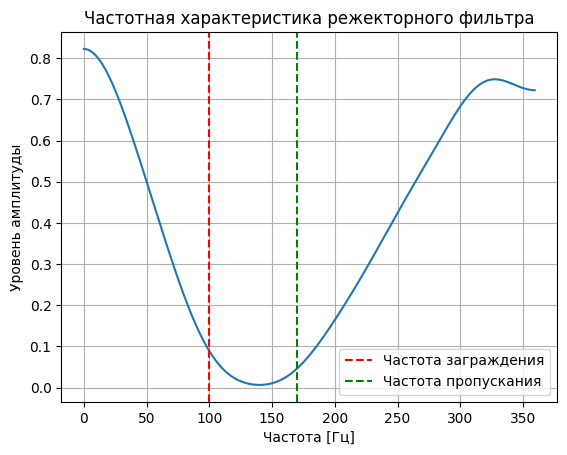

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin2, freqz, firwin

fs = 720  # Частота дискретизации
f0 = 150  # Основная частота
Fpass = 170  # Частота пропускания
Fstop = 100  # Частота заграждения
order = 22  # Порядок фильтра

# Определяем точки разделения частот для режекторного фильтра
freqs = [0, Fstop, Fpass, fs/2 - 1, fs/2]
# freqs =
# Задаем желаемый уровень амплитуды для каждой полосы частот
gains = [1, 0, 0, 1, 0]

# Создаем фильтр с помощью функции firwin2
# taps = firwin2(order, freqs, gains, fs=fs)
taps = firwin2(order+1, freqs, gains, fs=fs )

# Выводим коэффициенты фильтра
print('Коэффициенты фильтра:')
print(taps)

# Рисуем частотную характеристику фильтра
w, h = freqz(taps, a=1)
plt.plot(fs * 0.5 / np.pi * w, np.abs(h))
plt.axvline(x=Fstop, color='r', linestyle='--', label='Частота заграждения')
plt.axvline(x=Fpass, color='g', linestyle='--', label='Частота пропускания')
plt.title('Частотная характеристика режекторного фильтра')
plt.xlabel('Частота [Гц]')
plt.ylabel('Уровень амплитуды')
plt.legend()
plt.grid()
plt.show()